<a href="https://colab.research.google.com/github/ezequielhenrique/calculo-numerico/blob/master/atividade_07_PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cálculo Numérico - PVI

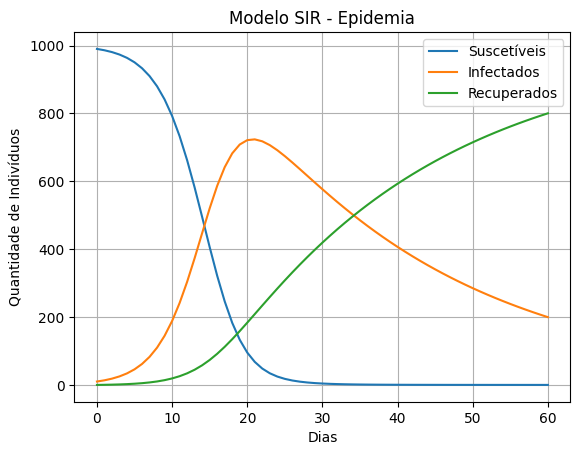

Dia do pico da epidemia: 21
Número de infectados no pico: 723
Dia em que a epidemia começa a ficar controlada: 27
Dia em que a epidemia começa a reduzir: 44
Dia em que a epidemia é considerada controlada (R = I): 35


In [4]:
import numpy as np
import matplotlib.pyplot as plt


beta = 0.4  # Coeficiente de transmissão da doença
gamma = 0.035 # Taxa de recuperação/cura dos infectados
populacao_total = 1000
days = 60
dt = 1  # Passo de tempo

S0 = 990
I0 = 10
R0 = 0

# Funções do modelo SIR
def dSdt(S, I):
    return -(beta / populacao_total) * S * I

def dIdt(S, I):
    return (beta / populacao_total) * S * I - gamma * I

def dRdt(I):
    return gamma * I

# Método de Runge-Kutta de ordem 2
def runge_kutta_2(S, I, R):
    S_new = S + dt * dSdt(S, I)
    I_new = I + dt * dIdt(S, I)
    R_new = R + dt * dRdt(I)
    return S_new, I_new, R_new

time_steps = np.arange(0, days + dt, dt)
S_vals = [S0]
I_vals = [I0]
R_vals = [R0]

peak_day = 0
peak_infections = 0
start_control_day = 0
start_reducing_day = 0
control_day = 0

for idx, t in enumerate(time_steps[:-1]):
    S, I, R = S_vals[-1], I_vals[-1], R_vals[-1]
    S_new, I_new, R_new = runge_kutta_2(S, I, R)
    S_vals.append(S_new)
    I_vals.append(I_new)
    R_vals.append(R_new)

    # Análise dos resultados
    if I_new > peak_infections:
        peak_infections = I_new
        peak_day = t + 1

    if I_new < peak_infections * 0.9 and start_control_day == 0:
        start_control_day = t + 1

    if I_new < peak_infections * 0.5 and start_reducing_day == 0:
        start_reducing_day = t + 1

    if I_new <= R_new and control_day == 0:
        control_day = t + 1

# Plot dos resultados
plt.plot(time_steps, S_vals, label='Suscetíveis')
plt.plot(time_steps, I_vals, label='Infectados')
plt.plot(time_steps, R_vals, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('Quantidade de Indivíduos')
plt.title('Modelo SIR - Epidemia')
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f'Dia do pico da epidemia: {peak_day}')
print(f'Número de infectados no pico: {int(peak_infections)}')
print(f'Dia em que a epidemia começa a ficar controlada: {start_control_day}')
print(f'Dia em que a epidemia começa a reduzir: {start_reducing_day}')
print(f'Dia em que a epidemia é considerada controlada (R = I): {control_day}')
